In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
import math
import cv2
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
import re

sys.path.append(os.getcwd()+'\\..\\scripts\\')
# plt.rcParams['figure.figsize'] = [25, 15]

# from MNGFeaturesRegions import MNGFeaturesRegions
# from MNGFeaturesMeans import MNGFeaturesMeans
# from MNGFeaturesGradient import MNGFeaturesGradient
%load_ext autoreload

%autoreload 2

In [2]:
data_path = os.getcwd()+'/../resampling/all_data_repeated.csv'
# data_path = os.getcwd()+'/../resampling/all_data_synthetic.csv'
old_data = pd.read_csv(data_path, sep=',', index_col=0)

In [3]:
to_be_deleted = [234, 385, 248, 110, 378, 159, 131, 252, 9, 53, 46, 153, 307, 203, 414, 412, 438, 20, 208, 188, \
                 357, 315, 246, 219, 235, 456, 261, 51, 339, 415, 67, 373, 52, 335, 201, 95, 129, 200, 364, 81, \
                 172, 291, 64, 367, 71, 255, 263, 40, 268, 165, 313, 316, 416, 404, 167, 238, 475, 32, 202, 345, \
                 294, 139, 324, 83, 15, 86, 254, 419, 477, 447, 207, 94, 318, 329, 249, 250, 85, 186, 361, 170, \
                 270, 100, 421, 258, 96, 69, 397, 451, 22, 181, 17, 59, 467, 215, 128, 230, 93, 286, 461, 337, \
                 468, 18, 271, 214, 391, 383, 82, 325, 228, 442, 274, 231, 122, 426, 401, 141, 143, 244, 192, 77]

In [4]:
# ATTENTION! I'M ASSIGNING IT MANUALLY, NOT BASED IN INDEX
resampled_data = old_data.iloc[-480:]
rows_to_delete = resampled_data.iloc[to_be_deleted]

data = old_data.drop(rows_to_delete.index.values)

# remove atributos diff
data = data.drop(columns=data.columns.values[:1710])

In [5]:
n_var_names = list(filter(lambda x: 'region' in x, data.columns.values))
data = data.drop(columns=n_var_names)
data.drop(columns=['height', 'width'], inplace=True)

In [71]:
rf_model = RandomForestRegressor(n_estimators=100).fit(data.drop(columns=['sst','firmeza', 'acidez', 'ratio', \
                                                                          'massa', 'time']), data['firmeza'])

In [72]:
tommy_features = os.listdir('../features')

In [73]:
df = pd.read_csv('../features/all.csv', index_col=0, sep=',')

In [74]:
df.drop(columns=['height', 'width'], inplace=True)

In [75]:
s1 = set(data.columns)

In [76]:
s2 = set(df.columns)

In [77]:
s1.difference(s2)

{'acidez', 'ratio'}

In [78]:
df.drop(columns=['sst', 'time', 'massa', 'firmeza']).columns

Index(['area', 'diameter', 'RG_rate', 'RB_rate', 'SH_rate', 'mean_R_full',
       'mean_G_full', 'mean_B_full', 'mean_H_full', 'mean_S_full',
       'mean_V_full', 'mean_L_full', 'mean_a_full', 'mean_b_full', 'bcd', 'cd',
       'dd', 'dominant_HSV', 'RG_diff_full', 'RB_diff_full', 'GB_diff_full',
       'apex_R', 'apex_G', 'apex_B', 'equator_R', 'equator_G', 'equator_B',
       'stalk_R', 'stalk_G', 'stalk_B', 'apex_equator_R_diff',
       'equator_stalk_R_diff', 'apex_stalk_R_diff', 'apex_equator_G_diff',
       'equator_stalk_G_diff', 'apex_stalk_G_diff', 'apex_equator_B_diff',
       'equator_stalk_B_diff', 'apex_stalk_B_diff', 'long_gradient'],
      dtype='object')

In [82]:
no_firm_rows = df[df['firmeza']==-1]

In [ ]:
df = df.drop(no_firm_rows.index.values)

In [91]:
predictions = rf_model.predict(df.drop(columns=['sst', 'time', 'massa', 'firmeza']))

In [92]:
r2_score(predictions, df['firmeza'])

-19.867246414122903

In [94]:
att = 'firmeza'

In [68]:
plt.rcParams.update({'font.size': 28})
plt.rcParams['figure.figsize'] = [25, 15]

/home/danielesreis/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


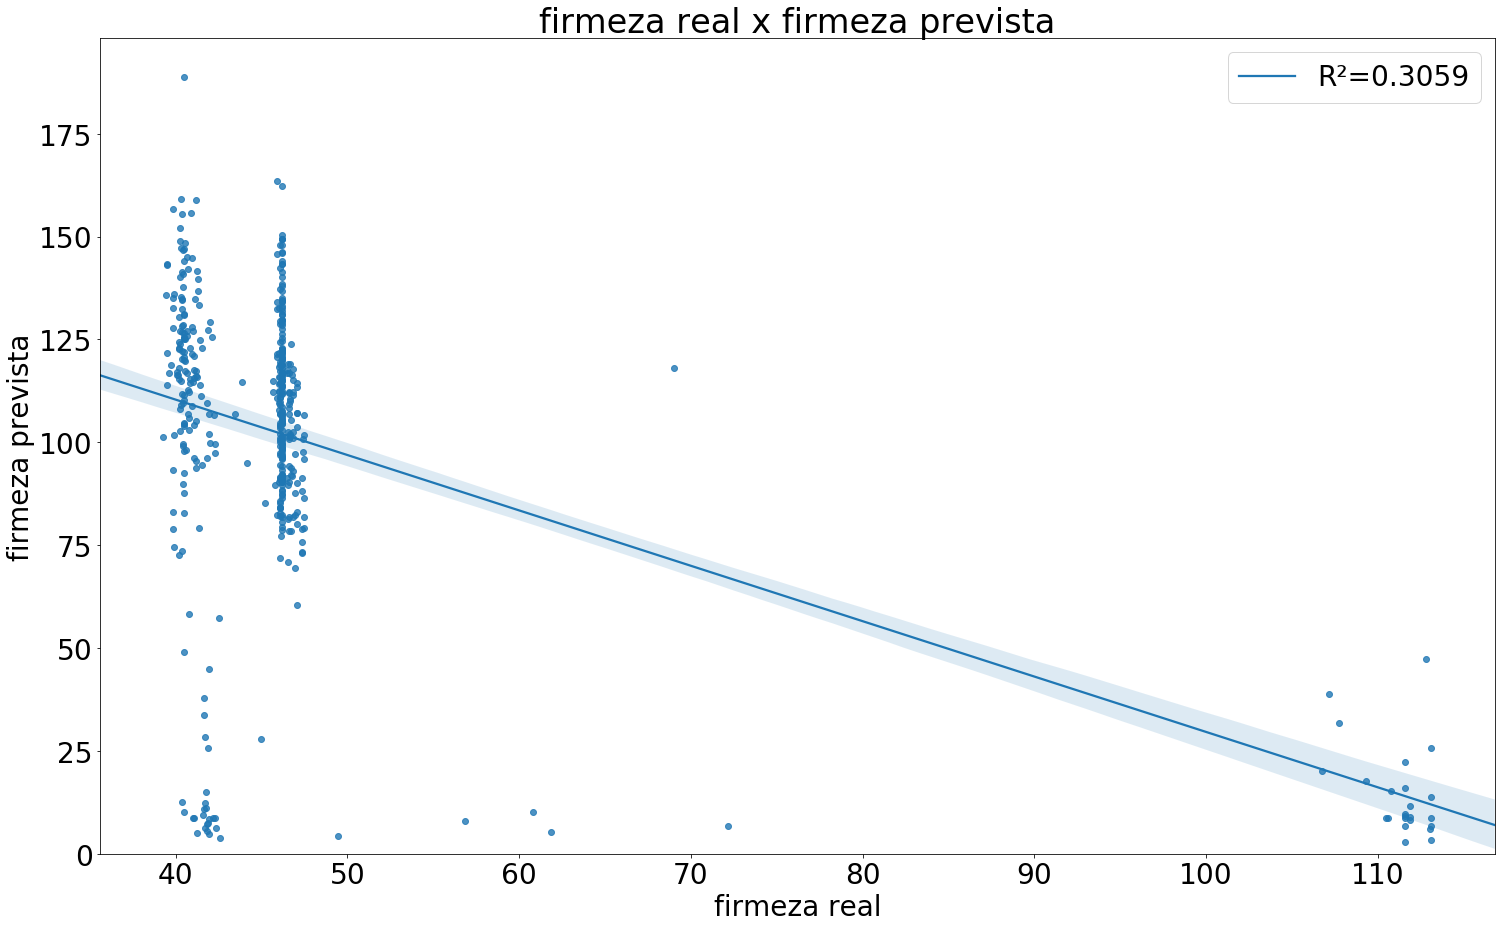

In [95]:
slope, intercept, r_value, p_value, std_err = stats.linregress(predictions, df[att])
ax = sns.regplot(predictions, df[att], line_kws={'label':"R²={0:.4f}".format(r_value**2)})
ax.legend()
ax.set(xlabel=att+' real', ylabel=att+' prevista', title=att+' real x '+att+' prevista', ylim=(0,None))
ax.get_figure().savefig('scatter_'+att+'_tommy.png')

In [58]:
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 28})

In [98]:
atts = ['mean_B_full', 'mean_a_full', 'equator_B', 'cd', 'RB_rate']

In [141]:
i = 3

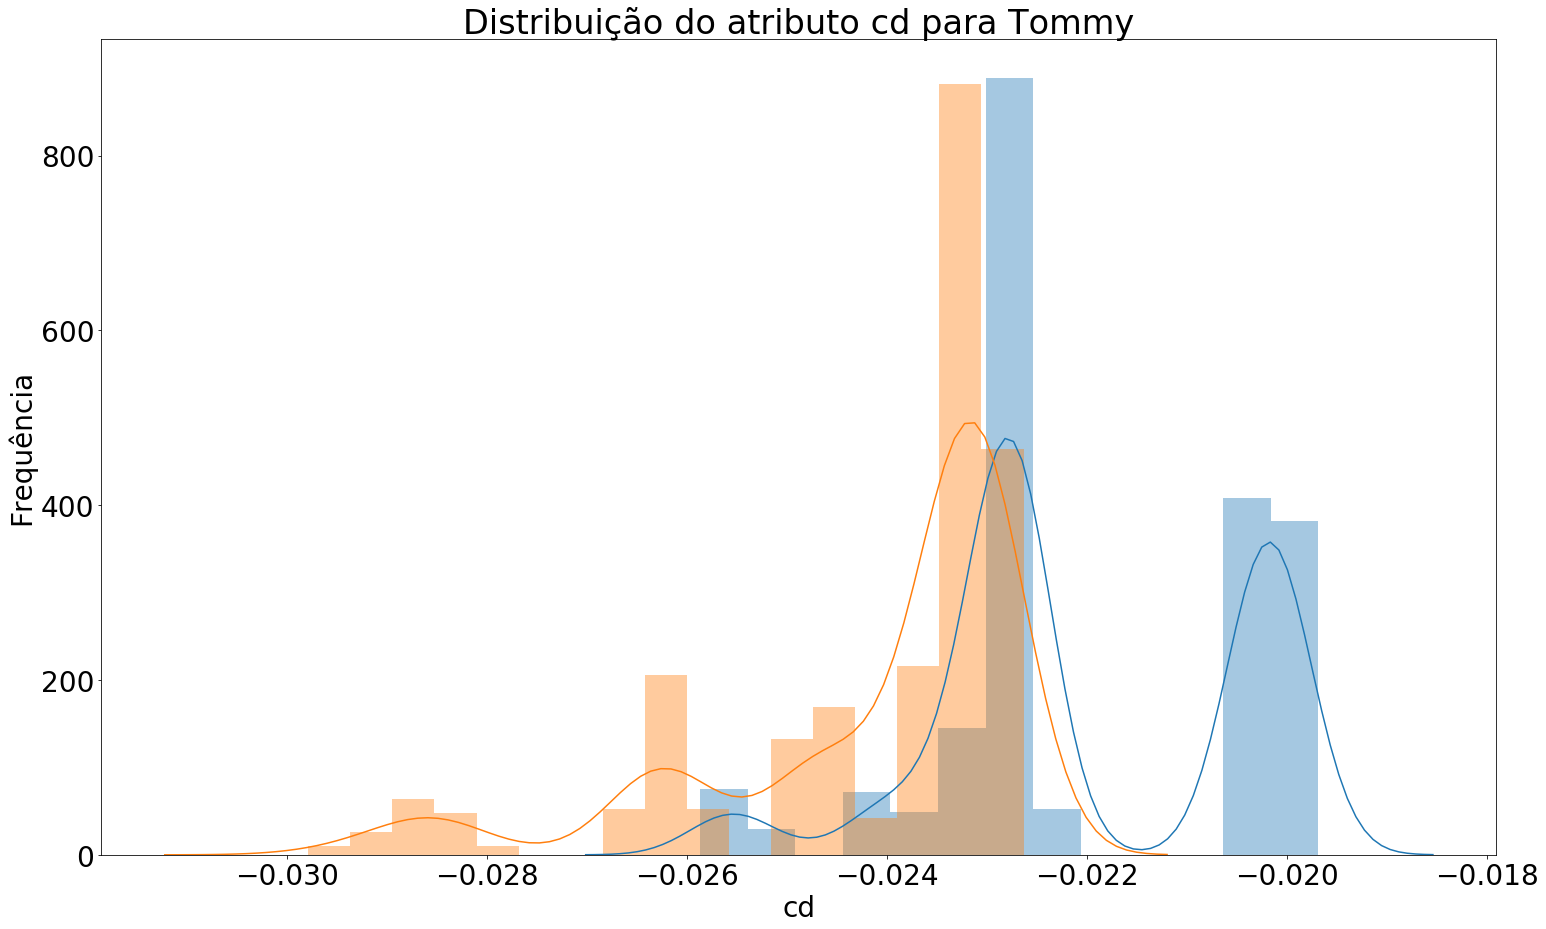

In [142]:
ax = sns.distplot(data[atts[i]])
ax = sns.distplot(df[atts[i]])

ax.set(xlabel=atts[i], ylabel='Frequência', title='Distribuição do atributo ' + atts[i] + ' para Tommy', ylim=(0,None))
ax.get_figure().savefig('dist_'+atts[i]+'_tommy.png')

In [134]:
atts.append('area')

In [178]:
i=3

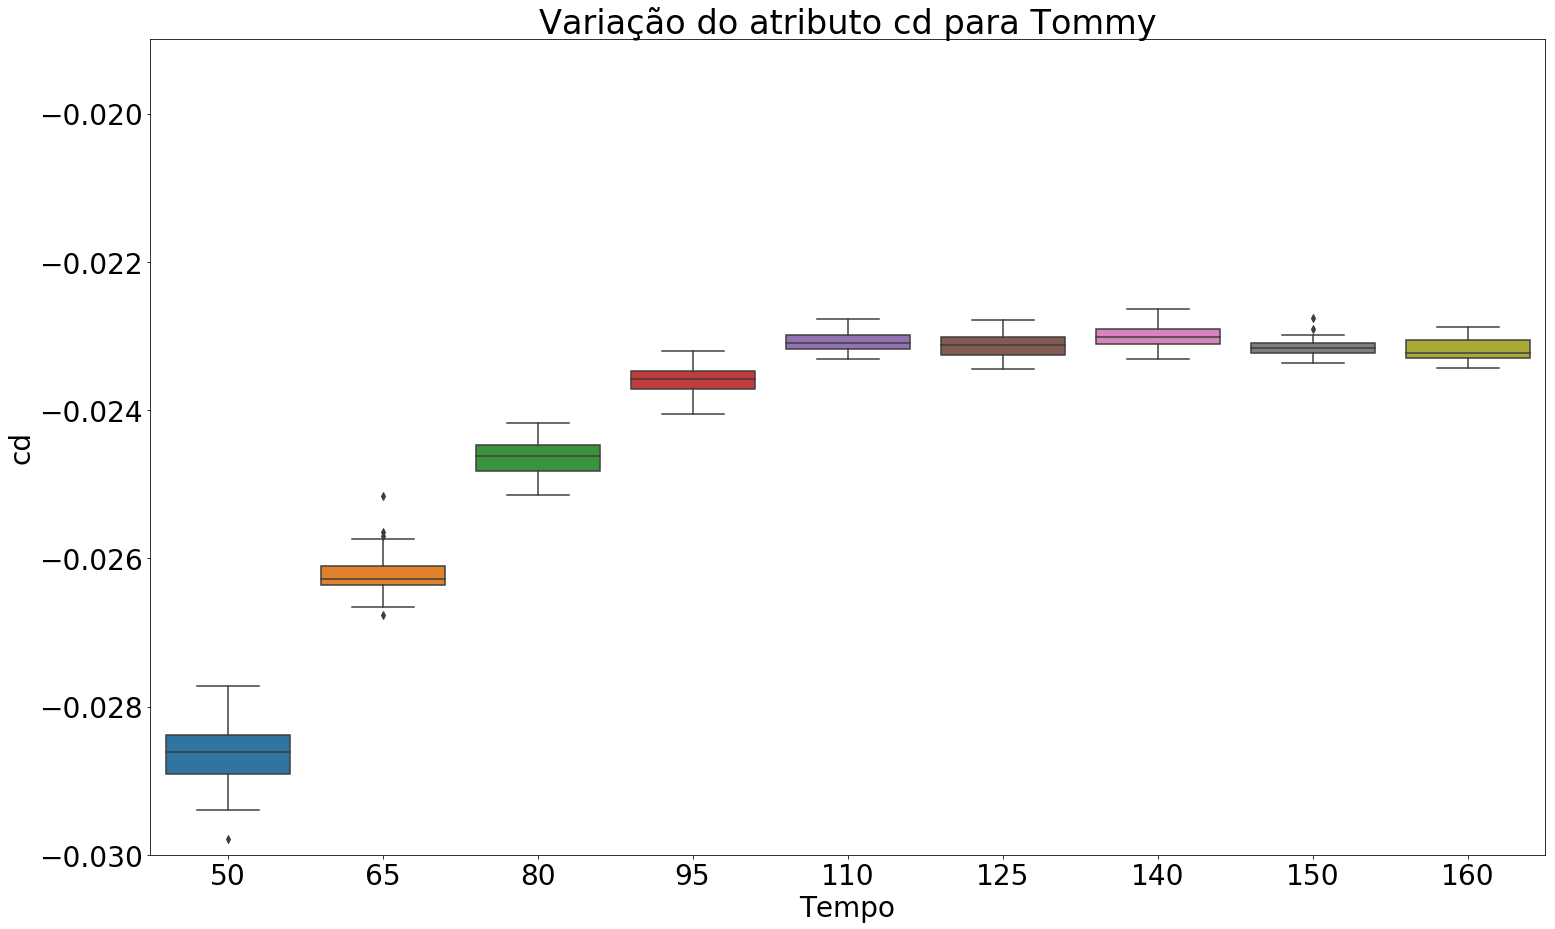

In [181]:
ax = sns.boxplot(x='time', y=atts[i], data=df)
ax.set(xlabel='Tempo', ylabel=atts[i], title='Variação do atributo ' + atts[i] + ' para Tommy', ylim=(-0.03, -0.019))
ax.get_figure().savefig('boxplot_'+atts[i]+'_tommy.png')